In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

In [2]:
def imshow(title='', image=None, size=8):
    if image is None:
        print("Error: Input image is None!")
        return
    
    w, h = image.shape[:2]
    plt.figure(figsize=(size * h / w, size))
    
    if len(image.shape) == 3:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    
    plt.title(title, fontsize=12)
    plt.axis('off')
    plt.show()

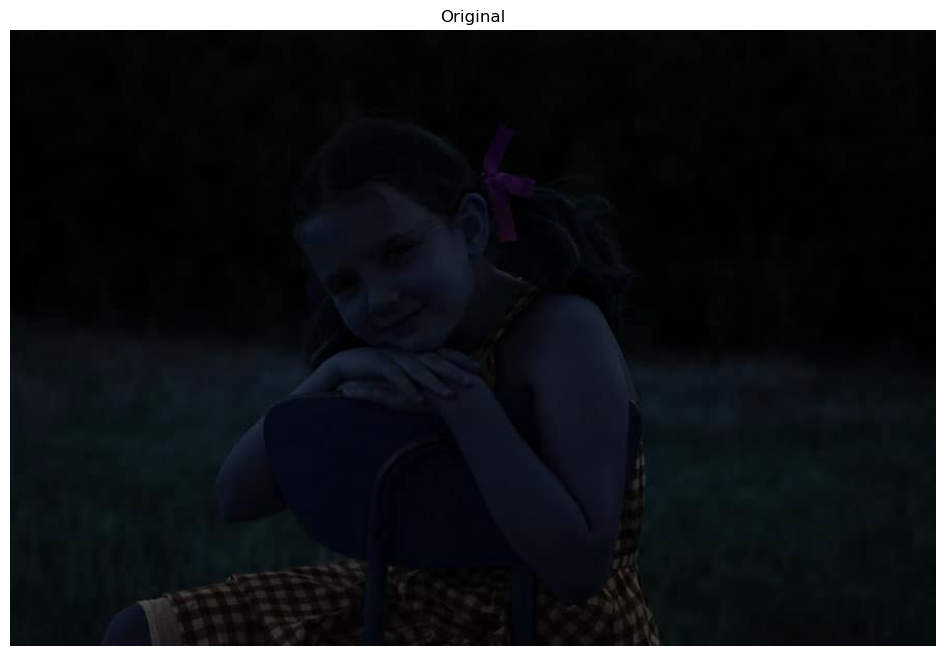

In [3]:
image = cv.imread("underexposedImage.jpg",cv.IMREAD_COLOR_RGB)
imshow("Original", image)

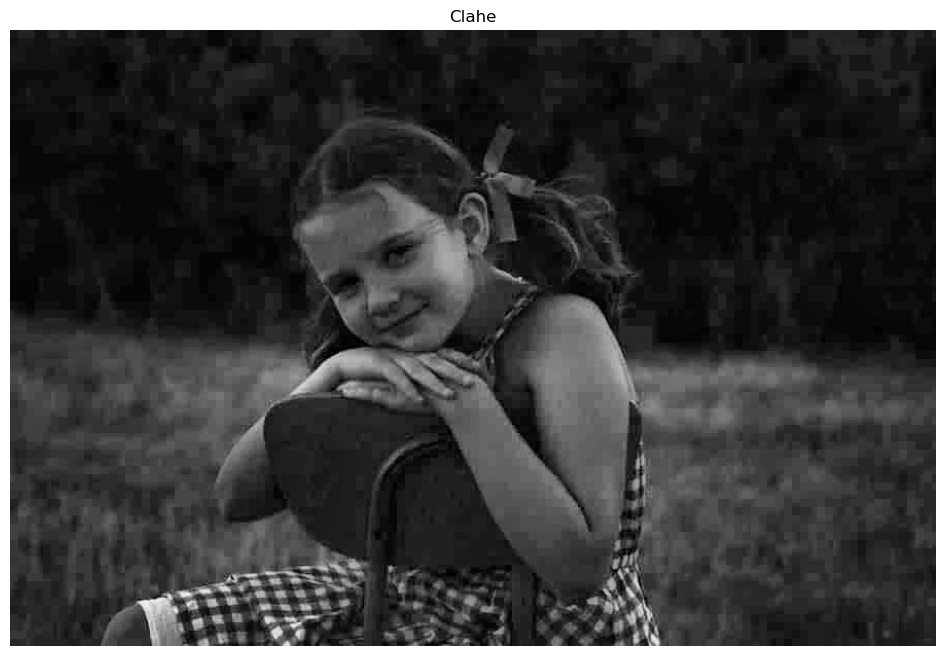

In [4]:
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image_clahe = clahe.apply(image_gray)
imshow("Clahe", image_clahe)

<h1>Use Log to increase brithness</h1> 

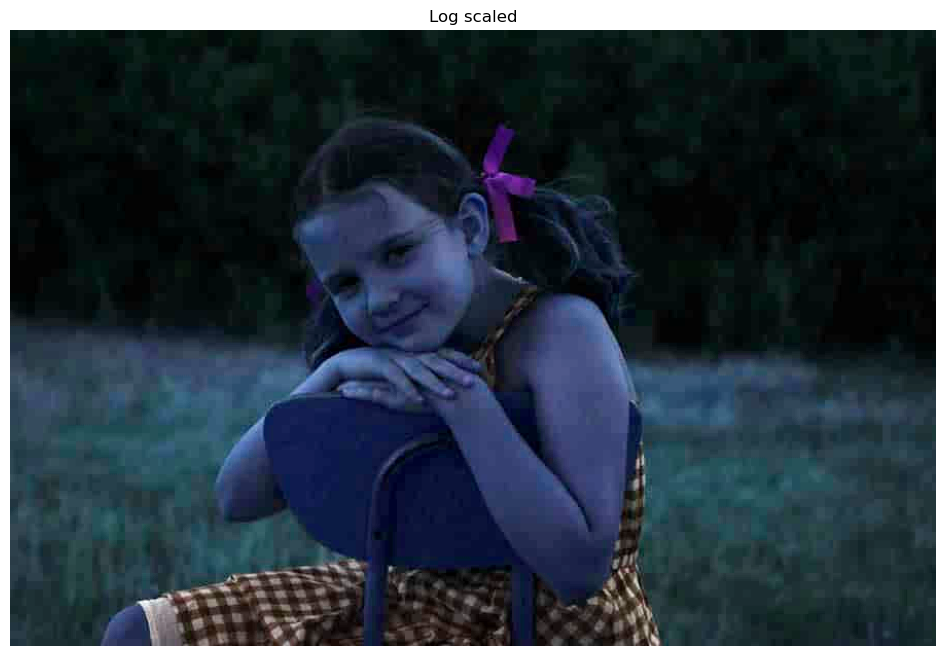

In [5]:
img_normalized = image.astype(np.float32) / 255.0

# اعمال log (برای جلوگیری از log(0) باید 1e-5 یا عدد کوچکی اضافه کنیم)
img_log = np.log(1 + img_normalized)

# ضرب در ضریب دلخواه برای افزایش روشنایی (مثلاً 255)
log_scaled = img_log * 1000

# برش دادن به محدوده 0 تا 255 و تبدیل به uint8
log_scaled = np.uint8(np.clip(log_scaled, 0, 255))
imshow("Log scaled", log_scaled)

<h1>Use power to increase brithness</h1>

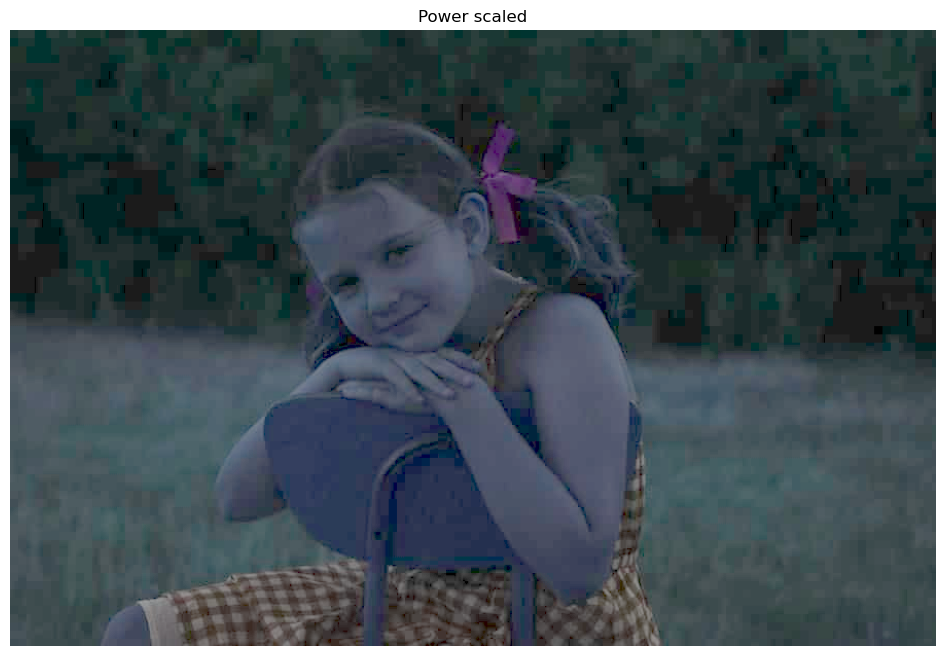

In [6]:
# تبدیل به float و نرمال‌سازی بین 0 و 1
img_normalized = image.astype(np.float32) / 255.0

# اعمال توان (Gamma correction) - مثلاً گاما = 0.5 برای روشن‌تر کردن
gamma = 0.4
img_gamma = np.power(img_normalized, gamma)

# ضرب در 255 برای بازگرداندن به محدوده‌ی اصلی
img_power = img_gamma * 255.0

# تبدیل به uint8
img_power = np.uint8(np.clip(img_power, 0, 255))
imshow("Power scaled", img_power)

<h1>Recognize edges improvment</h1>

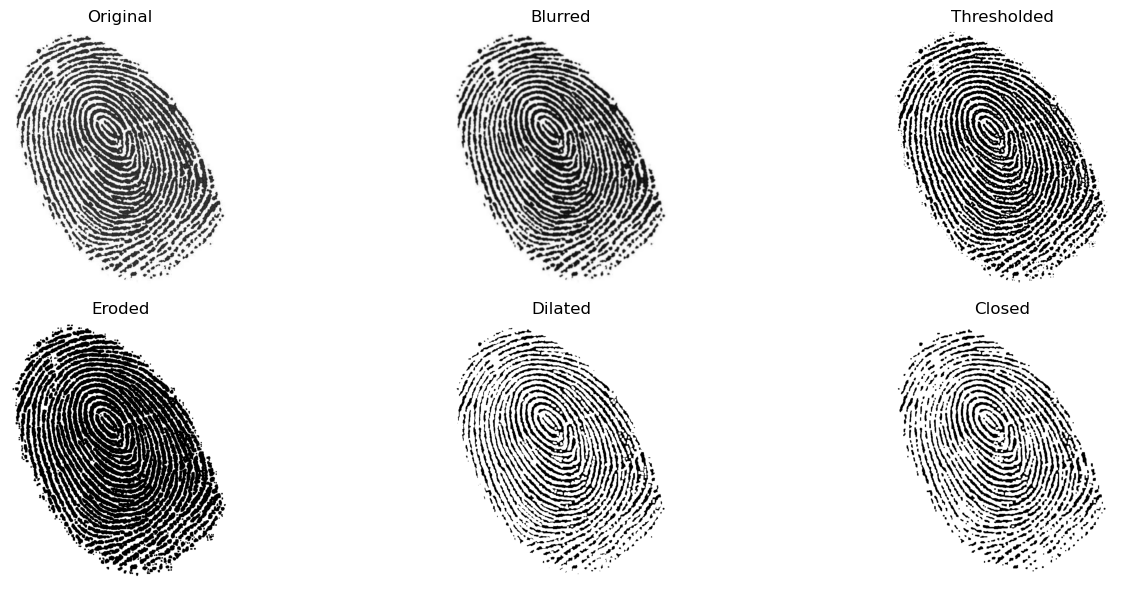

In [7]:
img = cv.imread('finger_print.jpg', cv.IMREAD_GRAYSCALE)

# اعمال فیلتر گاوسی برای کاهش نویز
blurred = cv.GaussianBlur(img, (5, 5), 0)

# آستانه‌گذاری تطبیقی (adaptive threshold)
thresh_adapt = cv.adaptiveThreshold(
    blurred, 255,
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY, 11, 2
)

# --- حالت خاص: حذف نقاط کوچک (noise cleaning) ---
# می‌تونیم با استفاده از erosion و سپس dilation انجامش بدیم
kernel = np.ones((3, 3), np.uint8)

# Erosion برای حذف نقاط کوچک سفید
eroded = cv.erode(thresh_adapt, kernel, iterations=1)

# Dilation برای پر کردن فضاهای کوچک و تقویت خطوط
dilated = cv.dilate(eroded, kernel, iterations=2)

# --- حالت خاص: استفاده از closing برای پر کردن شکاف‌ها در خطوط ---
closed = cv.morphologyEx(dilated, cv.MORPH_CLOSE, kernel, iterations=1)

# نمایش تصاویر مرحله به مرحله
titles = ['Original', 'Blurred', 'Thresholded', 'Eroded', 'Dilated', 'Closed']
images = [img, blurred, thresh_adapt, eroded, dilated, closed]

plt.figure(figsize=(15, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

<h1>Edge detection</h1>

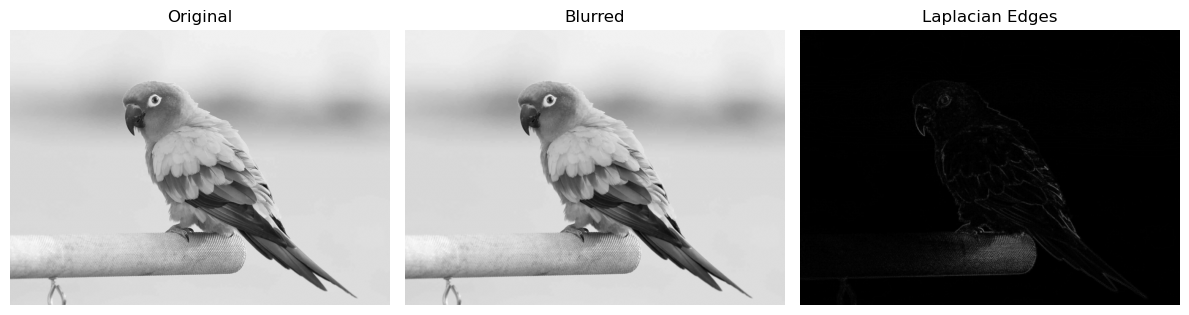

In [8]:
image = cv.imread("bird.jpeg",cv.IMREAD_GRAYSCALE)

# اعمال Gaussian Blur برای کاهش نویز
blurred = cv.GaussianBlur(image, (3, 3), 3)

# اعمال Laplacian (به صورت float برای حفظ مقادیر منفی/مثبت)
laplacian = cv.Laplacian(blurred, cv.CV_64F)

# تبدیل به uint8 با استفاده از قدر مطلق
laplacian_abs = cv.convertScaleAbs(laplacian)


# نمایش مراحل
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Blurred')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Laplacian Edges')
plt.imshow(laplacian_abs, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

<h1>Edge detection with Canny</h1>

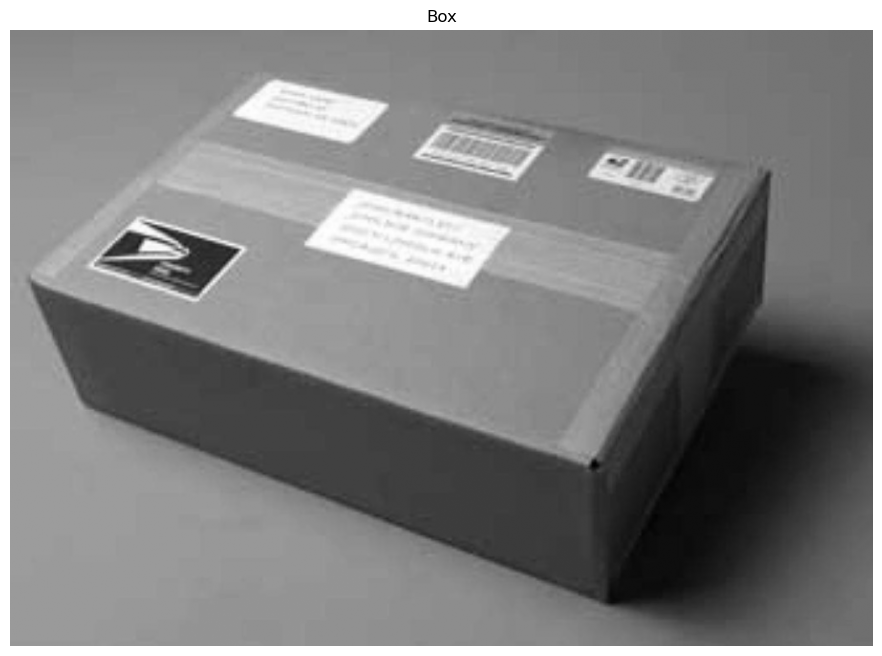

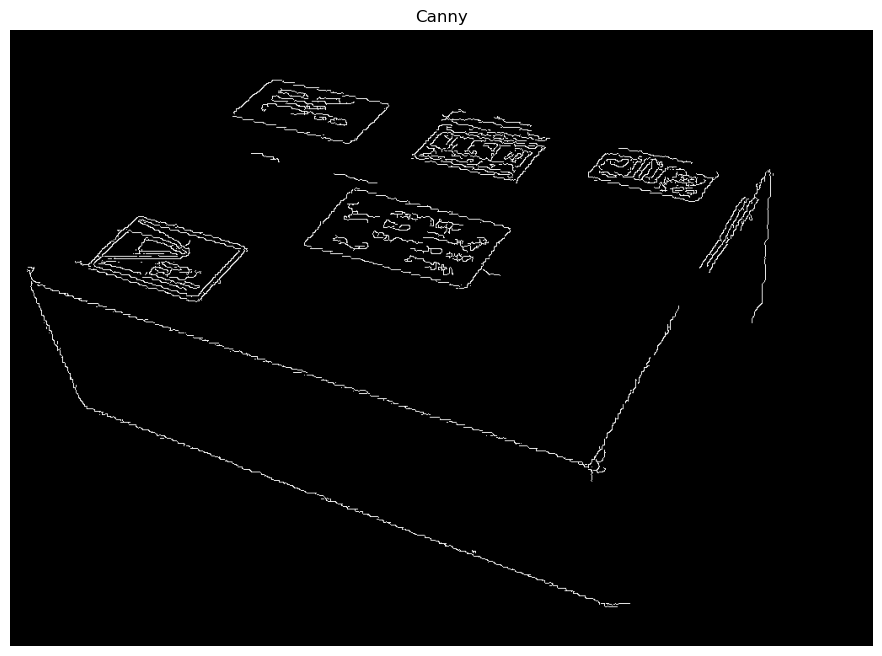

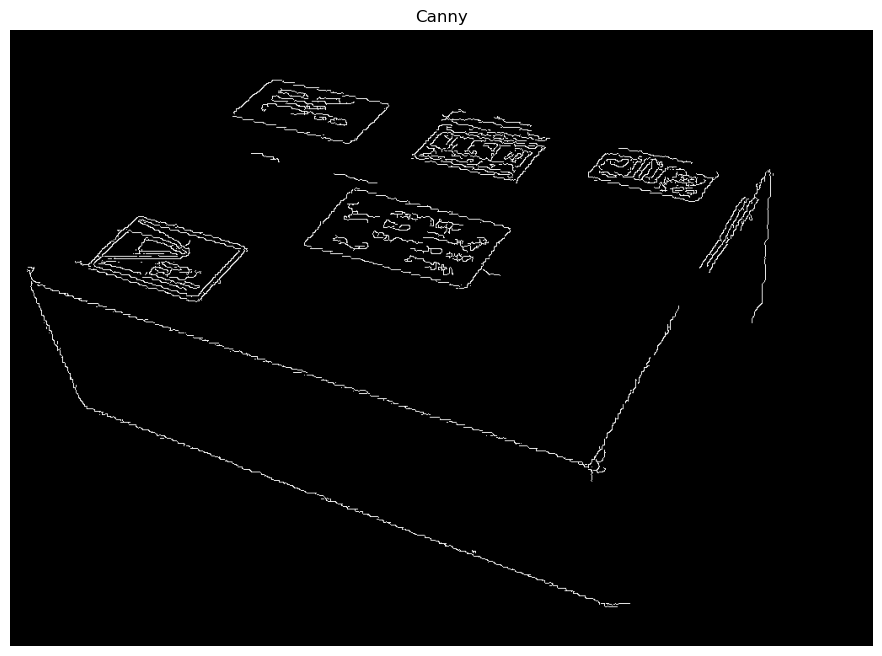

In [9]:
# خواندن تصویر در حالت خاکستری
box = cv.imread("box.jpg", cv.IMREAD_GRAYSCALE)

# بررسی خوانده شدن تصویر
if box is None:
    raise FileNotFoundError("تصویر box.jpg پیدا نشد.")

# box_contrast = cv.convertScaleAbs(box,None,3,0)

# بلور کردن تصویر
box_blur = cv.GaussianBlur(box, (3, 3), 3)
imshow("Box", box_blur)
# تشخیص لبه با Canny
canny = cv.Canny(box_blur, 10, 100)
imshow("Canny", canny)
# تعریف kernel برای Dilation
kernel = np.ones((3, 3), np.uint8)

# اعمال Dilation برای تقویت لبه‌ها
box_edge = cv.dilate(canny, kernel, iterations=2)

imshow("Canny", canny)

<h1>Countors</h1>

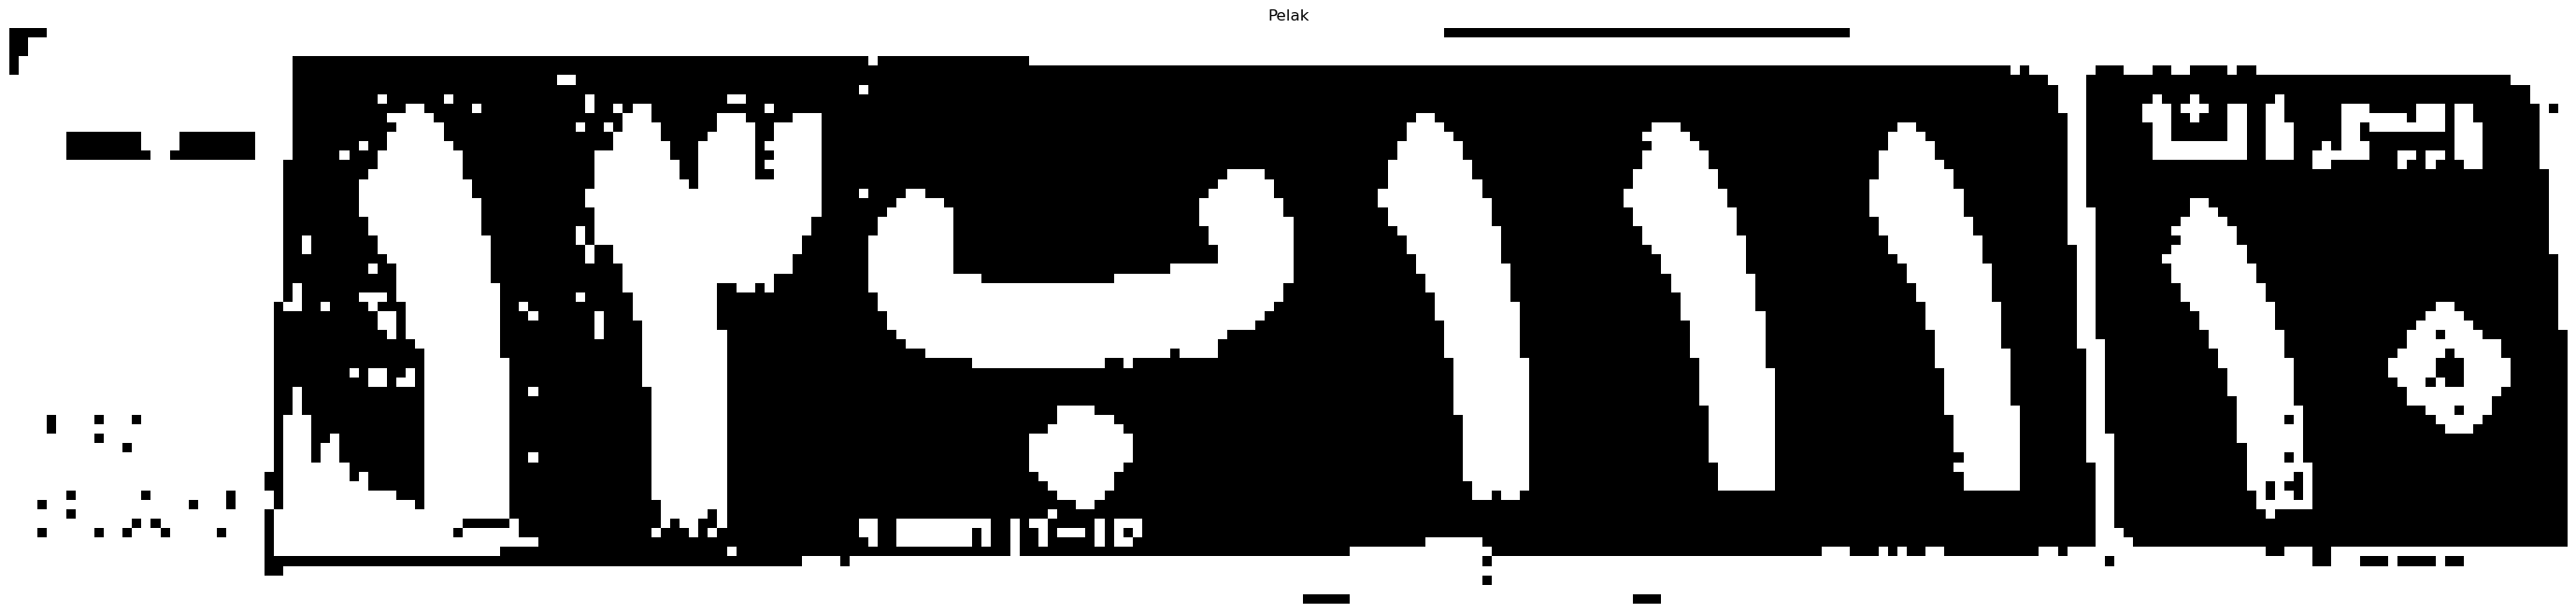

(array([[[257,  29]],

       [[256,  30]],

       [[255,  31]],

       [[254,  32]],

       [[254,  33]],

       [[253,  34]],

       [[252,  35]],

       [[252,  36]],

       [[253,  37]],

       [[254,  38]],

       [[254,  39]],

       [[255,  39]],

       [[256,  40]],

       [[257,  41]],

       [[258,  42]],

       [[259,  42]],

       [[260,  42]],

       [[261,  41]],

       [[262,  40]],

       [[262,  39]],

       [[263,  38]],

       [[264,  37]],

       [[264,  36]],

       [[264,  35]],

       [[263,  34]],

       [[263,  33]],

       [[262,  33]],

       [[261,  32]],

       [[260,  31]],

       [[259,  30]],

       [[258,  29]]], dtype=int32), array([[[258,  40]],

       [[259,  39]],

       [[260,  40]],

       [[259,  41]]], dtype=int32), array([[[255,  37]],

       [[256,  36]],

       [[257,  37]],

       [[256,  38]]], dtype=int32), array([[[257,  34]],

       [[258,  33]],

       [[259,  34]],

       [[260,  35]],

       [[26

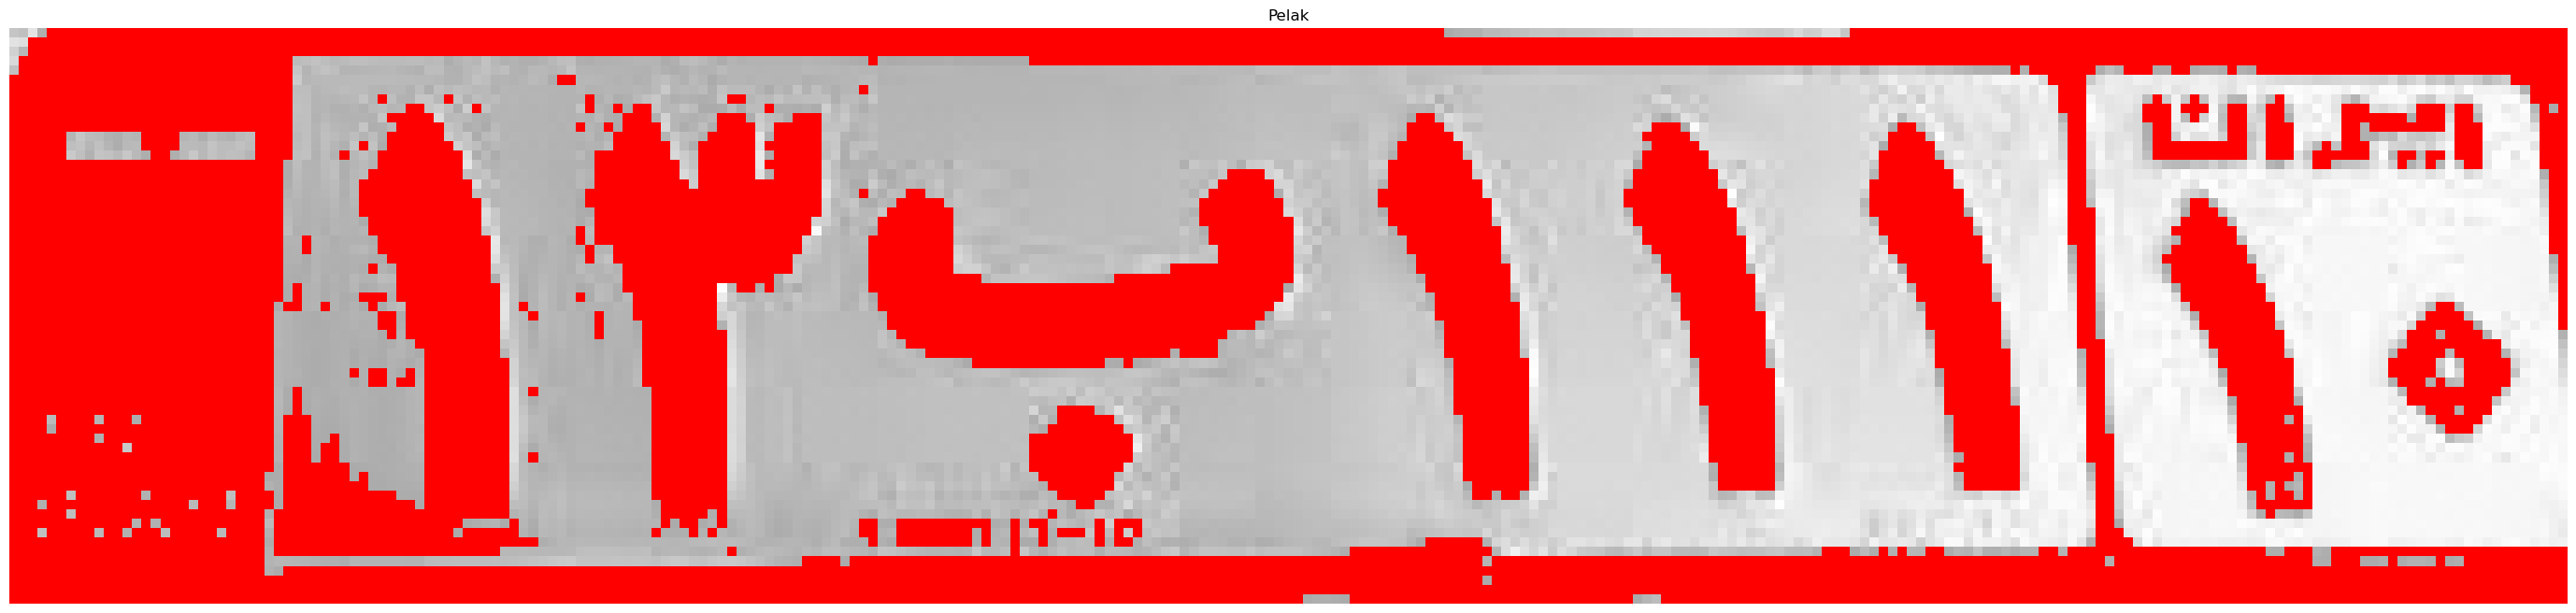

In [10]:
# خواندن تصویر در حالت خاکستری
pelak = cv.imread("pelak.jpg", cv.IMREAD_GRAYSCALE)

# بررسی اینکه تصویر درست بارگذاری شده یا نه
if pelak is None:
    raise FileNotFoundError("تصویر pelak.jpg پیدا نشد.")

# آستانه‌گذاری با روش Otsu
# _, pelak_thr = cv.threshold(pelak, 0, 50, cv.THRESH_BINARY + cv.THRESH_OTSU)
_, pelak_thr = cv.threshold(pelak, 170, 255, cv.THRESH_BINARY_INV)
imshow("Pelak", pelak_thr)
# پیدا کردن کانتور از روی تصویر باینری
# contours, _ = cv.findContours(pelak_thr, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
contours, _ = cv.findContours(pelak_thr, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
print(contours)

# تبدیل تصویر خاکستری به رنگی برای رسم کانتور به رنگ قرمز
pelak_color = cv.cvtColor(pelak, cv.COLOR_GRAY2BGR)

# رسم کانتورها
cv.drawContours(pelak_color, contours, -1, (0, 0, 255), -1)
imshow("Pelak", pelak_color)

# از canny edge detector هم میشه استفاده کرد

<h1>Video</h1>

In [43]:
def video_frame_analysis(frame, back):
    lower_bond = np.array([10,10,10])
    upper_bond = np.array([220,220,220])
    mask = cv.inRange(frame, lower_bond, upper_bond)
    frame_mask = cv.bitwise_and(frame, frame, mask=mask)
    back = cv.resize(back, (frame.shape[1], frame.shape[0]))
    mask_inv = cv.bitwise_not(mask)
    background_part = cv.bitwise_and(back, back, mask=mask_inv)
    result = cv.add(frame_mask, background_part)
    cv.imshow("Result", result)

In [55]:
def recognize_face(frame):
    blurred = cv.GaussianBlur(frame, (9, 9), 3)
    ycrcb = cv.cvtColor(blurred, cv.COLOR_BGR2YCrCb)
    lower_skin = np.array([0, 133, 77], dtype=np.uint8)
    upper_skin = np.array([255, 173, 127], dtype=np.uint8)
    mask = cv.inRange(ycrcb, lower_skin, upper_skin)
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv.contourArea(cnt)
        if area > 3000:
            x, y, w, h = cv.boundingRect(cnt)
            cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv.imshow("Face Detection", frame)

In [56]:
source = cv.VideoCapture(0)
cv.namedWindow("Source", cv.WINDOW_NORMAL)
back = cv.imread("Grassland.jpeg", cv.IMREAD_COLOR_RGB)

while (cv.waitKey(1) != ord('q')):
    
    exist_flag, frame = source.read()
    if not exist_flag:
        break
        
    # video_frame_analysis(frame, back)
    recognize_face(frame)
    
    
cv.destroyAllWindows()
source.release()

<h1>YOLO ;)</h1>